In [3]:
import itertools
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pandas.plotting import scatter_matrix
from numpy.linalg import inv
import sklearn as sk
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
import pickle

In [4]:
def loadDataFiles():
    market_df = pickle.load(open('Market_train',"rb"))
    news_df = pickle.load(open("News_train", "rb"))
    print('Finished loading datafiles!')
    return market_df, news_df



In [2]:
def preprocess_data(mkt_df, news_df):
    mkt_df['time'] = pd.to_datetime(mkt_df['time'])
    news_df['time'] = pd.to_datetime(news_df['time'])
    mkt_df['time'] = mkt_df['time'].dt.date
    news_df['time'] = news_df['time'].dt.date
    assetCodes = []
    index = 0
    for x in news_df['assetCodes']:
        x = x.split(',')[0].split("'")[1]
        assetCodes.append(x)
    news_df['assetCode'] = np.asarray(assetCodes)
    irrelevantColumns = ['sourceTimestamp', 'firstCreated', 'sourceId', 
                         'headline', 'provider', 'subjects', 'audiences',
                        'headlineTag', 'marketCommentary', 'assetCodes', 'assetName']
    news_df.drop(irrelevantColumns, axis=1, inplace=True)
    mkt_df.drop(['assetName'], axis=1, inplace=True)
    modifiednews = news_df.groupby(['time','assetCode'], sort=False).aggregate(np.mean).reset_index()
    
    # join news reports to market data, note many assets will have many days without news data
    merged = pd.merge(mkt_df, modifiednews, how='left', on=['time', 'assetCode'], copy=False) 
    merged = merged.fillna(0)
    print('Finished preprocessing data!')
    return merged

In [5]:
market_data, news_data = loadDataFiles()


Finished loading datafiles!


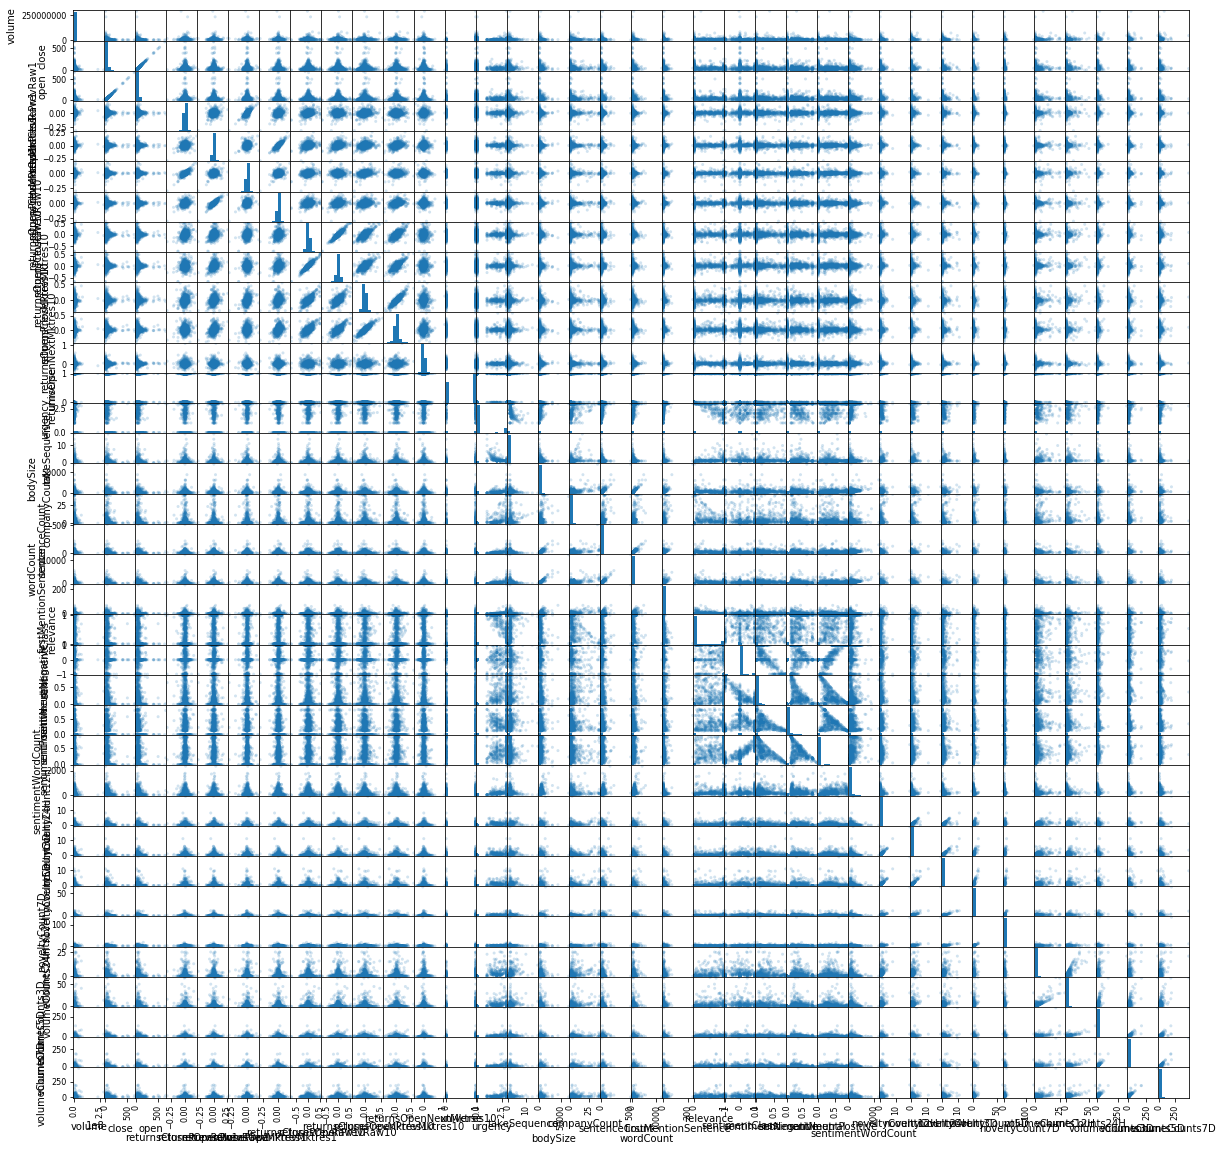

In [9]:
X = preprocess_data(market_data, news_data)
sample = X.sample(n=3000)
sm = scatter_matrix(sample, alpha = 0.2, figsize = (20,20))


In [10]:
print(sample.columns.values)

['time' 'assetCode' 'volume' 'close' 'open' 'returnsClosePrevRaw1'
 'returnsOpenPrevRaw1' 'returnsClosePrevMktres1' 'returnsOpenPrevMktres1'
 'returnsClosePrevRaw10' 'returnsOpenPrevRaw10' 'returnsClosePrevMktres10'
 'returnsOpenPrevMktres10' 'returnsOpenNextMktres10' 'universe' 'urgency'
 'takeSequence' 'bodySize' 'companyCount' 'sentenceCount' 'wordCount'
 'firstMentionSentence' 'relevance' 'sentimentClass' 'sentimentNegative'
 'sentimentNeutral' 'sentimentPositive' 'sentimentWordCount'
 'noveltyCount12H' 'noveltyCount24H' 'noveltyCount3D' 'noveltyCount5D'
 'noveltyCount7D' 'volumeCounts12H' 'volumeCounts24H' 'volumeCounts3D'
 'volumeCounts5D' 'volumeCounts7D']
